# Fit dati del libro

Siccome la Fra è simpatica e dobbiamo fare dei fit per trovarci lo spessore dell'oro senza dover fare ogni volta cambi di laboratorio ci ha chiesto di fare un fit dei dati...
Stefano alla chiamata risponde dicendo, vaffanculo facciamo.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
import pandas as pd
import scipy.interpolate as interpolate

%matplotlib inline
# c = scipy.c # light speed, may be needed for a conversion
# hbar = scipy.hbar # hbar... may be needed for a conversion


# Dati del Palik

In [27]:
palik = pd.read_csv("./data/book_data/Tabella_1.csv", sep=";")
palik.head()


,eV,cm^-1,Angstrom,exp_lenght,n,k,exp_k
0,"9,919.00",0.0,1.25,-10.0,0.999972,2.39,-6.0
1,"9,184.00",0.0,1.35,-10.0,0.999966,3.13,-6.0
2,"8,551.00",0.0,1.45,-10.0,0.999961,4.02,-6.0
3,"8,266.00",0.0,1.50,-10.0,0.999958,4.52,-6.0
4,"7,085.00",0.0,1.75,-10.0,0.999942,7.78,-6.0


In [28]:
palik["lambda_corrected"] = palik["Angstrom"] * 10 ** palik["exp_lenght"]
palik["k_corrected"] = palik["k"] * 10 ** palik["exp_k"]
palik.head()

,eV,cm^-1,Angstrom,exp_lenght,n,k,exp_k,lambda_corrected,k_corrected
0,"9,919.00",0.0,1.25,-10.0,0.999972,2.39,-6.0,1.250000e-10,0.000002
1,"9,184.00",0.0,1.35,-10.0,0.999966,3.13,-6.0,1.350000e-10,0.000003
2,"8,551.00",0.0,1.45,-10.0,0.999961,4.02,-6.0,1.450000e-10,0.000004
3,"8,266.00",0.0,1.50,-10.0,0.999958,4.52,-6.0,1.500000e-10,0.000005
4,"7,085.00",0.0,1.75,-10.0,0.999942,7.78,-6.0,1.750000e-10,0.000008


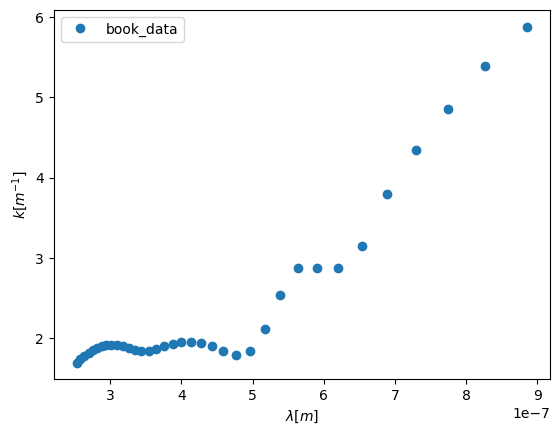

In [29]:
plt.plot(
    "lambda_corrected",
    "k_corrected",
    "o",
    data=palik[(palik["lambda_corrected"] < 900e-9) & (palik["lambda_corrected"] > 250e-9)],
    label="book_data",
)
plt.xlabel(r"$\lambda [m]$")
plt.ylabel(r"$k [m^{-1}]$")
plt.legend()

/home/pilo/anaconda3/envs/codeLab/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


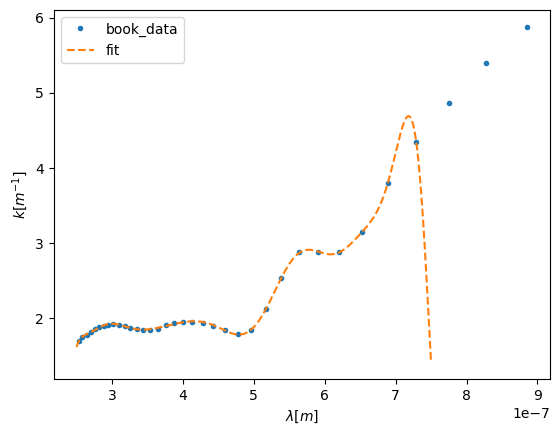

In [30]:
filter = (palik["lambda_corrected"] < 900e-9) & (palik["lambda_corrected"] > 250e-9)
coeff = np.polyfit(palik[filter]["lambda_corrected"], palik[filter]["k_corrected"], deg=26)
fun = np.poly1d(coeff)

# x = palik[filter]["lambda_corrected"]
x = np.linspace(250e-9, 750e-9, 500)

plt.plot("lambda_corrected", "k_corrected", ".", data=palik[filter], label="book_data")
plt.plot(x, fun(x), "--", label="fit")
plt.xlabel(r"$\lambda [m]$")
plt.ylabel(r"$k [m^{-1}]$")
plt.legend()

## Simuliamo spettro

Ora  che abbiamo uno spettro dell'oro funzionante facciamo una simulazione dello spettro dell'oro
Usiamo dati raccolti in precedenza per fare un confronto, usando anche lo spessore dichiarato dalla microbilancia.

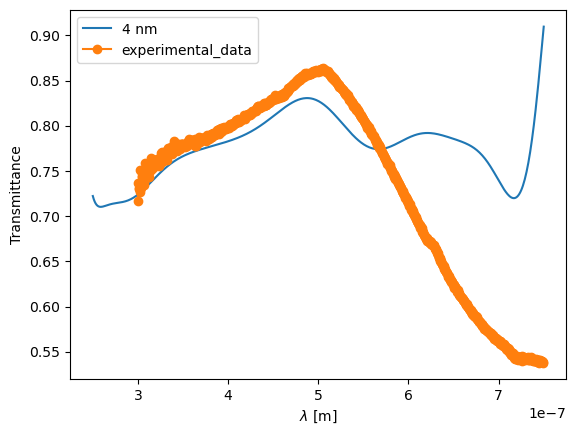

In [31]:
def hypotetical_fun(x: float, fit: callable, spessore: float) -> float:
    return np.exp(-4.0 * np.pi * fit(x) * spessore / x)


x = np.linspace(250e-9, 750e-9, 500)

spessore = 15e-6

data = pd.read_csv("./data/Pre-21-04/oro_4_04_ELABORATO.csv")
data2 = pd.read_csv("./data/2-5/ELAB/Oror-oro 3_1.csv")

data["lambda"] = data["lambda"] * 1e-9
data2["lambda"] = data2["lambda"] * 1e-9

# plt.plot(x, hypotetical_fun(x, fun, spessore=60e-9), label = "60 nm")
plt.plot(x, hypotetical_fun(x, fun, spessore=4e-9), label="4 nm")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data[(data["lambda"] > 300e-9) & (data["lambda"] < 750e-9)],
    label="experimental_data",
)

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")

# plt.plot(x, fun(x), label = 'k')
plt.legend()

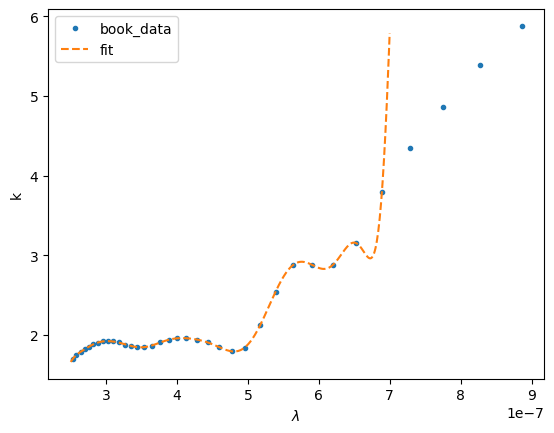

In [32]:
## Testing a New Numpy Class for fitting a Polynomial Series
#
filter = (palik["lambda_corrected"] < 900e-9) & (palik["lambda_corrected"] > 250e-9)

new_fit = Polynomial.fit(
    palik[filter]["lambda_corrected"],
    palik[filter]["k_corrected"],
    deg=22,
    domain=[200e-9, 950e-9],
)

plt.plot("lambda_corrected", "k_corrected", ".", data=palik[filter], label="book_data")
plt.plot(x[x < 700e-9], new_fit(x[x < 700e-9]), "--", label="fit")
plt.ylabel("k")
plt.xlabel(r"$\lambda$")
plt.legend()

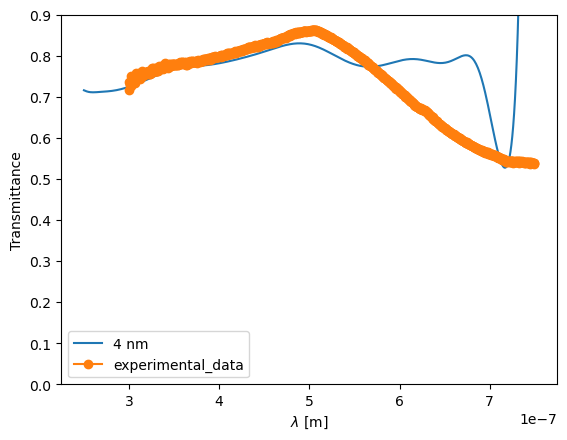

In [33]:
plt.plot(x, hypotetical_fun(x, new_fit, spessore=4e-9), label="4 nm")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data[(data["lambda"] > 300e-9) & (data["lambda"] < 750e-9)],
    label="experimental_data",
)
plt.ylim((0, 0.9))
plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")
plt.legend()

# Nuovo tentativo di fit

Abbiamo visto che la libreria Scipy ha ulteriori metodi per fare i Fit. Li poviamo, se i risultati sono migliori bene se no Amen.

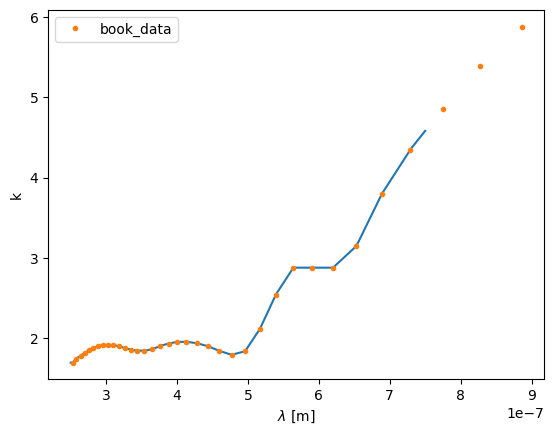

In [34]:
import scipy.interpolate

filter = (palik["lambda_corrected"] < 950e-9) & (palik["lambda_corrected"] > 250e-9)

ynew = np.interp(x, palik[filter]["lambda_corrected"], palik[filter]["k_corrected"])


plt.plot(x, ynew)
plt.plot("lambda_corrected", "k_corrected", ".", data=palik[filter], label="book_data")


plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("k")

plt.legend()

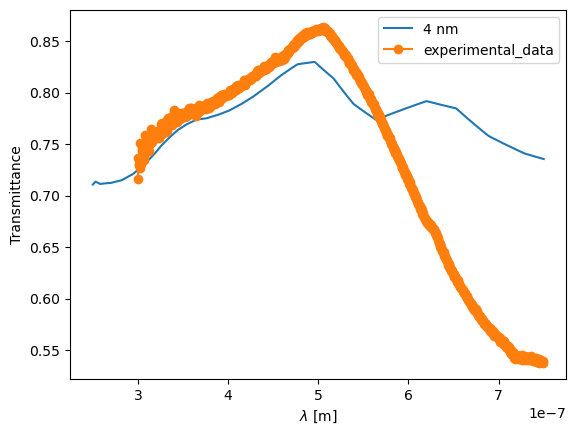

In [35]:
plt.plot(x, np.exp(-4.0 * np.pi * ynew * 4e-9 / x), label="4 nm")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data[(data["lambda"] > 300e-9) & (data["lambda"] < 750e-9)],
    label="experimental_data",
)

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")

plt.legend()

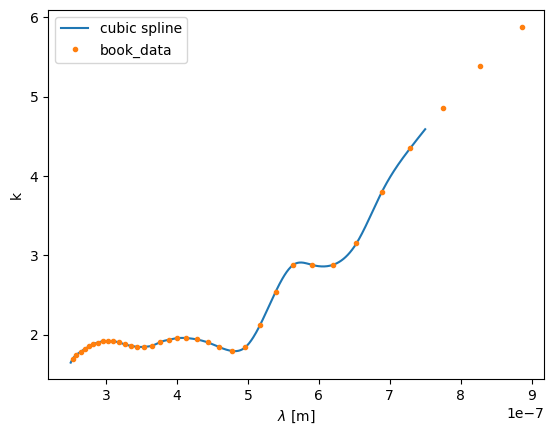

In [36]:
spl_palik = scipy.interpolate.CubicSpline(
    palik[filter]["lambda_corrected"], palik[filter]["k_corrected"]
)


plt.plot(x, spl_palik(x), label="cubic spline")
plt.plot("lambda_corrected", "k_corrected", ".", data=palik[filter], label="book_data")

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("k")


plt.legend()
# unisce i puntini e tiene la derivata prima continua e derivabile, mentre la seconda solo continua.

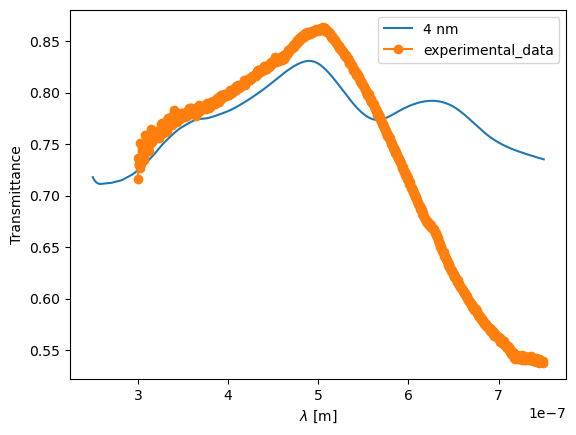

In [37]:
plt.plot(x, hypotetical_fun(x, spl_palik, spessore=4e-9), label="4 nm")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data[(data["lambda"] > 300e-9) & (data["lambda"] < 750e-9)],
    label="experimental_data",
)

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")

plt.legend()

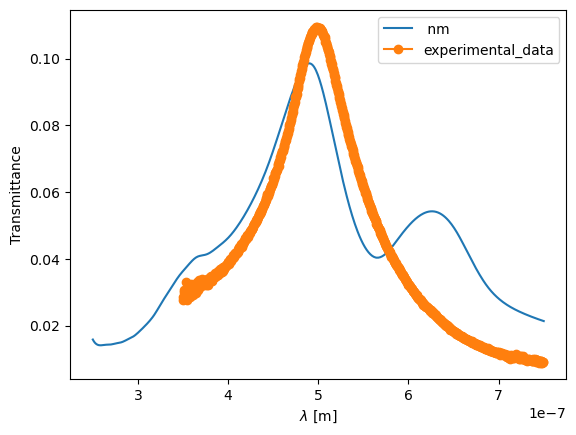

In [38]:
# qui usiamo le misure del 2-5 con oro di spessore compreso fra 50 e 120 nm
# i k trovati nel libro variano da 10 a 25 nm, quindi questo fit preso con l'oro non nanometrico non va bene
plt.plot(x, hypotetical_fun(x, spl_palik, spessore=50e-9), label=" nm")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data2[(data2["lambda"] > 300e-9) & (data2["lambda"] < 750e-9)],
    label="experimental_data",
)

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")

plt.legend()

# Fit con dati ottenuti da Johnson

Usiamo adesso i dati ottenuti da Johnson per vedere se otteniamo qualcosa di migliore...

In [39]:
johnson = pd.read_csv("./data/book_data/Johnson.csv")
johnson.head()


,wl,n,k
0,0.1879,1.28,1.188
1,0.1916,1.32,1.203
2,0.1953,1.34,1.226
3,0.1993,1.33,1.251
4,0.2033,1.33,1.277


In [40]:
johnson.wl *= 1e-6  # Dalla descrizione del file CSV si vede che la lunghezza d'onda riportata è in micrometri...
johnson.head()

,wl,n,k
0,1.879000e-07,1.28,1.188
1,1.916000e-07,1.32,1.203
2,1.953000e-07,1.34,1.226
3,1.993000e-07,1.33,1.251
4,2.033000e-07,1.33,1.277


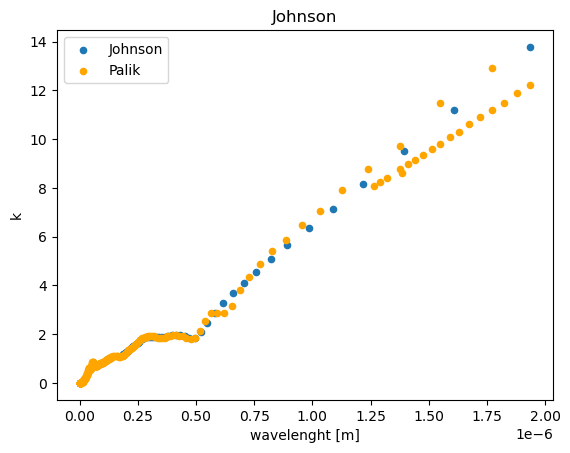

In [41]:
fig, ax = plt.subplots()


johnson.plot(
    x="wl", y="k",
    kind="scatter",
    title="Johnson",
    xlabel="wavelenght [m]", ylabel="k",
    ax = ax,
    label="Johnson"
)

palik[palik["lambda_corrected"] <= johnson["wl"].max() ].plot(
    x="lambda_corrected", y = "k_corrected",
    kind="scatter",
    title="Johnson",
    xlabel="wavelenght [m]", ylabel="k",
    ax = ax,
    c="orange",
    label="Palik"
)

ax.legend()



## Facciamo effettivamente questo fit

Adesso che abbiamo fatto effettivamente una visualizzazione dei dati e grosso modo ripropongono quelli esposti da Palik vediamo se nella regione di nostro interesse si comportano meglio.
Mi limiterò ai dati nel range del visibile per le nostre analisi. (300 - 750) nm
Visti i buoni risultati ottenuti in precedenza userò sempre il metodo CubicSpline.

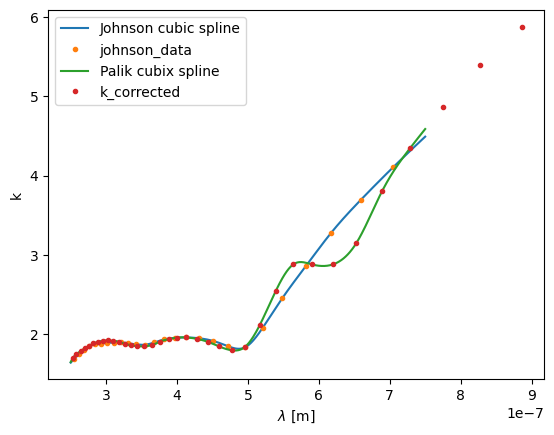

In [43]:

filter_john = (johnson.wl >= 250e-9) & (johnson.wl <= 750e-9)

spl_john = scipy.interpolate.CubicSpline(
    johnson["wl"], johnson["k"]
)

# dati di Johnson
plt.plot(x, spl_john(x), label="Johnson cubic spline")
plt.plot("wl", "k", ".", data=johnson[filter_john], label="johnson_data")

# Giusto per curiosità inserisco anche i dati ottenuti da Palik

plt.plot(x, spl_palik(x), label= "Palik cubix spline")
plt.plot("lambda_corrected", "k_corrected", ".",data=palik[filter])


plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("k")


plt.legend()
# unisce i puntini e tiene la derivata prima continua e derivabile, mentre la seconda solo continua.

Si nota una certa differnza tra i due andamenti, questo dovrebbe risultare anche in una differenza una volta che si inserisca la forma nella Beer Lambert law...

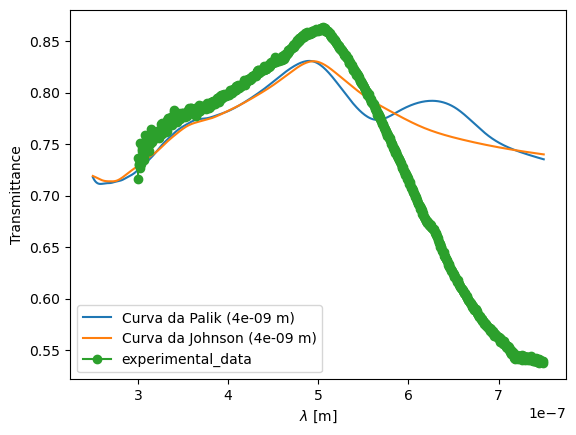

In [48]:
thick = 4e-9

plt.plot(x, hypotetical_fun(x, spl_palik, thick), label= f"Curva da Palik ({thick} m)")
plt.plot(x, hypotetical_fun(x, spl_john, thick), label= f"Curva da Johnson ({thick} m)")

plt.plot(
    "lambda",
    "polished",
    "-o",
    data=data[(data["lambda"] > 300e-9) & (data["lambda"] < 750e-9)],
    label="experimental_data",
)

plt.xlabel(r"$\lambda$ [m]")
plt.ylabel("Transmittance")

plt.legend()